In [102]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np

matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # Win용
matplotlib.rcParams['font.size'] = 15                 # 글자 크기
# matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac용
matplotlib.rcParams['axes.unicode_minus'] = False

In [103]:
df = pd.read_csv('drinks.csv')

In [104]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [105]:
df['continent'].fillna('OT', inplace=True)
df

C:\Users\KOSMO\AppData\Local\Temp\ipykernel_13948\1392432863.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['continent'].fillna('OT', inplace=True)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


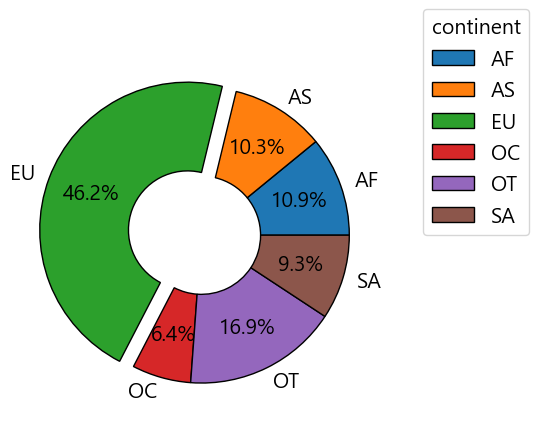

In [106]:
# total_servings 컬럼 추가
df['total_servings'] = df['beer_servings'] + df['spirit_servings'] + df['wine_servings']

# 대륙별 total_servings 그래프로 출력
values = df.groupby('continent')['total_servings'].sum()
labels = df.groupby('continent')['continent'].unique().str[0]

wedgeprops = {'width': 0.6, 'edgecolor': 'black'}
explode = [0, 0, 0.1, 0, 0, 0]

plt.pie(values, labels=labels, \
        wedgeprops=wedgeprops, autopct='%.1f%%', pctdistance=0.7, explode=explode)

plt.legend(loc=(1.1, 0.5), title='continent')

plt.show()

In [107]:
## total_litres_of_pure_alcohol
## 전체 평균보다 많은 알코올 도수를 섭취하는 대륙을 출력하시오.
# 1. 전체 평균 도수 구하기
# 2. 대륙별 도수 평균 구하기
# 3. 필터 구하기
# 4. 필터 적용해서 출력
# 1.
data = df['total_litres_of_pure_alcohol'].mean()
# 2.
total_df = df.groupby('continent')['total_litres_of_pure_alcohol'].mean()
# 3.
# filt = df['키']>=180
# df[filt]
filt = total_df > data
total_df[filt]


continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [108]:
# 평균 beer_servings가 가장 높은 대륙
# 대륙별 beer_servings를 높은 순으로 출력하시오.
## 제일 높은 것만 출력
df.groupby('continent')['beer_servings'].mean().sort_values(ascending=False).head(1)
df.groupby('continent')['beer_servings'].mean().max()     # index의 value값
df.groupby('continent')['beer_servings'].mean().idxmax()  # index가 출력

'EU'

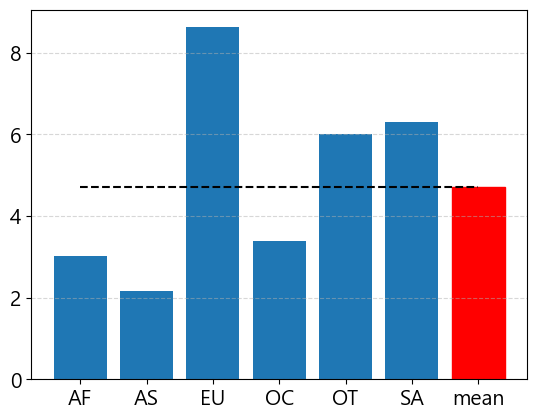

In [142]:
## 대륙별 total_litres_of_pure_alcohol 막대그래프로 출력하시오.
## 마지막에는 평균 막대그래프를 출력하시오.
# 1. 전체 total_litres_of_pure_alcohol 평균을 구하기
data = df['total_litres_of_pure_alcohol'].mean()
n_data = [data]*6
# 2. 대륙별 total_litres_of_pure_alcohol 평균을 구하기
# 'AF', 'AS', 'EU', 'OC', 'OT', 'SA'
con_df = df.groupby('continent')['total_litres_of_pure_alcohol'].mean()
con_df
# 3. 컬럼에 대륙별 평균을 추가하기 mean
con_df['mean'] = data
# 4. 막대그래프를 출력
con_bar = plt.bar(con_df.index,con_df)
plt.plot(con_df.index,[data]*7,ls="--",color='black')
plt.grid(axis='y',ls='--',alpha=0.5)  # 격자선
# con_bar[len(con_df)-1].set_color('red')
con_bar[len(con_df)-1].set_color('red')

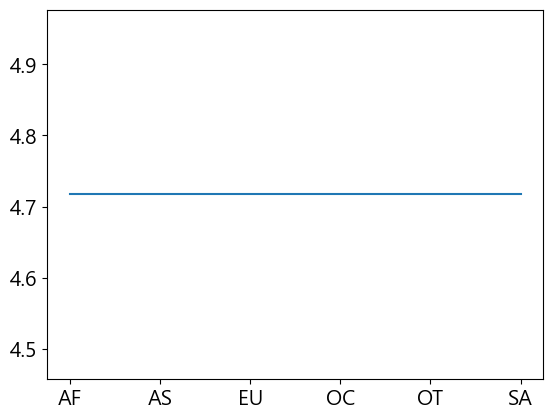

In [ ]:
x = total_df.index
y = [data] * 6

plt.plot(x, y)